# Intel image Classification


## Import Packages

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torchvision import models
import os

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !unzip '/content/drive/MyDrive/Intel_image/archive.zip'

In [ ]:
# Fetch the Classes from folder
train_path = '/content/seg_train/seg_train/'
test_path = '/content/seg_test/seg_test/'
pred_path = '/content/seg_pred/seg_pred/'

In [ ]:
trans = transforms.Compose([transforms.ToTensor(),
                            transforms.Resize([256, 256])
                    ])

train_dataset = torchvision.datasets.ImageFolder(root=train_path,transform=trans)
test_dataset = torchvision.datasets.ImageFolder(root=test_path,transform=trans)


In [ ]:
image, label = train_dataset[0]
print(f"Image Size: {image.shape}")
print(f"Label: {label}")
print(image)

Image Size: torch.Size([3, 256, 256])
Label: 0
tensor([[[0.9686, 0.9686, 0.9686,  ..., 0.9686, 0.9686, 0.9686],
         [0.9671, 0.9677, 0.9686,  ..., 0.9686, 0.9686, 0.9686],
         [0.9648, 0.9663, 0.9685,  ..., 0.9686, 0.9686, 0.9686],
         ...,
         [0.2995, 0.2563, 0.1894,  ..., 0.2131, 0.1786, 0.1562],
         [0.2581, 0.2375, 0.2057,  ..., 0.2061, 0.2093, 0.2114],
         [0.2314, 0.2254, 0.2162,  ..., 0.2017, 0.2292, 0.2471]],

        [[0.9686, 0.9686, 0.9686,  ..., 0.9686, 0.9686, 0.9686],
         [0.9671, 0.9677, 0.9686,  ..., 0.9686, 0.9686, 0.9686],
         [0.9648, 0.9663, 0.9685,  ..., 0.9686, 0.9686, 0.9686],
         ...,
         [0.2956, 0.2523, 0.1855,  ..., 0.1935, 0.1590, 0.1366],
         [0.2542, 0.2336, 0.2018,  ..., 0.1865, 0.1897, 0.1918],
         [0.2275, 0.2215, 0.2123,  ..., 0.1820, 0.2096, 0.2275]],

        [[0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608],
         [0.9593, 0.9599, 0.9607,  ..., 0.9608, 0.9608, 0.9608],
         [0

# DataLoader

In [ ]:
train_dataloader = DataLoader(dataset= train_dataset,
                          batch_size= 32,
                          shuffle=True,
                          num_workers=2)

val_dataloader = DataLoader(dataset= test_dataset,
                          batch_size= 32,
                          num_workers=2)

dataloaders_dict = {
    "train": train_dataloader,
    "val": val_dataloader,
}

In [ ]:
batch_iterator = iter(dataloaders_dict["train"])
inputs, labels = next(batch_iterator)
print(inputs.size())
print(labels)

torch.Size([32, 3, 256, 256])
tensor([4, 2, 5, 1, 4, 1, 1, 4, 1, 2, 5, 2, 2, 4, 5, 0, 2, 0, 3, 2, 0, 2, 4, 0,
        4, 5, 5, 2, 3, 4, 4, 5])


<Figure size 2880x1440 with 0 Axes>

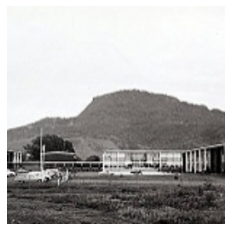

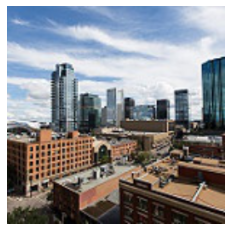

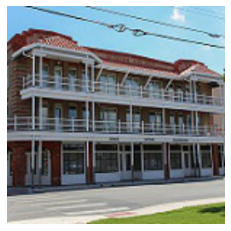

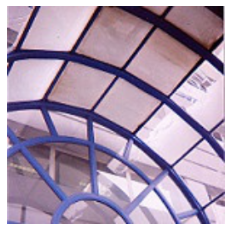

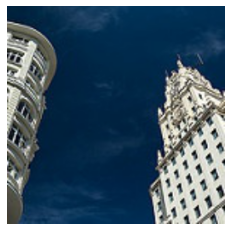

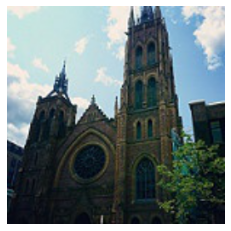

In [ ]:
fig = plt.figure(figsize=(40, 20))
cnt = 0
for batch in train_dataset:
    plt.figure(figsize=(8, 4))
    image, _ = batch
    plt.imshow(make_grid(image, nrow=16).permute(1, 2, 0))
    plt.axis("off")
    plt.show()
    if cnt == 5:
        break
    cnt += 1

In [ ]:
net = models.vgg16(pretrained=True)

print(net.classifier)

net.classifier[6] = nn.Linear(in_features=4096, out_features=6)

net = net.to(device)

net.train()

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
params_to_update = []

update_param_names = ["classifier.6.weight", "classifier.6.bias"]

for name, param in net.named_parameters():
    if name in update_param_names:
        param.requires_grad = True
        params_to_update.append(param)
        print(name)
    else:
        param.requires_grad = False
        
print("--------------")
print(params_to_update)

classifier.6.weight
classifier.6.bias
--------------
[Parameter containing:
tensor([[-9.3132e-08, -1.4600e-02,  5.2022e-03,  ..., -6.9572e-03,
          6.1874e-03,  3.0443e-03],
        [-1.3137e-02,  4.6624e-03,  7.0050e-04,  ..., -9.9021e-04,
         -5.6744e-03,  1.4142e-02],
        [ 9.9828e-03,  8.0150e-03,  6.3070e-03,  ...,  1.1241e-03,
         -7.3134e-04, -9.3972e-03],
        [-2.1608e-03,  5.2849e-03,  5.5337e-03,  ..., -9.3036e-03,
          2.7882e-03, -9.9587e-03],
        [-1.4127e-02, -1.4842e-02,  1.4176e-02,  ..., -1.3739e-02,
          1.1831e-02, -4.0138e-03],
        [-1.2978e-02,  1.2218e-02, -8.8122e-03,  ...,  1.1703e-03,
          2.1974e-03, -1.2461e-02]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([ 0.0040,  0.0150, -0.0075,  0.0104, -0.0025, -0.0074], device='cuda:0',
       requires_grad=True)]


Define of Loss Function and Optimization

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

## Train & Vaildation 



In [ ]:
def train_model(net, dataloaders_dict, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        print("-------------------")
        
        for phase in ['train', 'val']:
            if phase == 'train':
                net.train()
            else:
                net.eval()
                
            epoch_loss = 0.0
            epoch_corrects = 0
            
            # To check validate performance
            if (epoch == 0) and (phase == 'train'):
                continue
            
            for inputs, labels in tqdm(dataloaders_dict[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase=='train'):
                    outputs = net(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, dim=1)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        
                    epoch_loss += loss.item() * inputs.size(0)
                    epoch_corrects += torch.sum(preds == labels.data)
            
            epoch_loss = epoch_loss / len(dataloaders_dict[phase].dataset)
            epoch_acc = epoch_corrects.double() / len(dataloaders_dict[phase].dataset)
            
            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

In [ ]:
num_epochs = 10
train_model(net , dataloaders_dict, criterion, optimizer, num_epochs)

Epoch 1/10
-------------------


100%|██████████| 94/94 [00:21<00:00,  4.42it/s]


val Loss: 1.8001 Acc: 0.1580
Epoch 2/10
-------------------


100%|██████████| 439/439 [01:41<00:00,  4.32it/s]


train Loss: 0.4497 Acc: 0.8396


100%|██████████| 94/94 [00:21<00:00,  4.30it/s]


val Loss: 0.3259 Acc: 0.8883
Epoch 3/10
-------------------


100%|██████████| 439/439 [01:41<00:00,  4.33it/s]


train Loss: 0.4142 Acc: 0.8611


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


val Loss: 0.3212 Acc: 0.8937
Epoch 4/10
-------------------


100%|██████████| 439/439 [01:41<00:00,  4.33it/s]


train Loss: 0.4226 Acc: 0.8633


100%|██████████| 94/94 [00:22<00:00,  4.25it/s]


val Loss: 0.3444 Acc: 0.8850
Epoch 5/10
-------------------


100%|██████████| 439/439 [01:41<00:00,  4.30it/s]


train Loss: 0.4096 Acc: 0.8656


100%|██████████| 94/94 [00:22<00:00,  4.25it/s]


val Loss: 0.3541 Acc: 0.8767
Epoch 6/10
-------------------


100%|██████████| 439/439 [01:41<00:00,  4.34it/s]


train Loss: 0.4141 Acc: 0.8658


100%|██████████| 94/94 [00:22<00:00,  4.27it/s]


val Loss: 0.3153 Acc: 0.8897
Epoch 7/10
-------------------


100%|██████████| 439/439 [01:42<00:00,  4.29it/s]


train Loss: 0.4029 Acc: 0.8694


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


val Loss: 0.3368 Acc: 0.8867
Epoch 8/10
-------------------


100%|██████████| 439/439 [01:41<00:00,  4.31it/s]


train Loss: 0.3977 Acc: 0.8720


100%|██████████| 94/94 [00:22<00:00,  4.25it/s]


val Loss: 0.3312 Acc: 0.8803
Epoch 9/10
-------------------


100%|██████████| 439/439 [01:41<00:00,  4.31it/s]


train Loss: 0.4049 Acc: 0.8719


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]


val Loss: 0.3472 Acc: 0.8937
Epoch 10/10
-------------------


100%|██████████| 439/439 [01:41<00:00,  4.32it/s]


train Loss: 0.4086 Acc: 0.8731


100%|██████████| 94/94 [00:22<00:00,  4.26it/s]

val Loss: 0.3749 Acc: 0.8767
